## Reinforcement Learning
### CartPole environment in AI GYM
### Random Search for weight parameters that decide actions

#### Importing the AI GYM

In [0]:
import gym
import matplotlib.pyplot as plt
import numpy as np

#### Importing some future functions available in Python 3

In [0]:
from __future__ import print_function, division
from builtins import range

#### Environment Action space

|Num|Action|
|---|---|
|0|Push Cart to the Left|
|1|Push Cart to the Right|

#### S=State; W=Weights
#### Our action depends on the dot product of S & W.
#### That is if S.W >0; then action =1 else action =0

In [0]:
def get_action(s, w):
  return 1 if s.dot(w) > 0 else 0

#### Defining single episode run. The recent CartPole version is only allowing upto 200 iterations, hence though t is meant to run for 10000 iterations, it will infact run upto 200 iterations.

#### Rewards are all 1 but they are being ignored.

#### Here we are interested in returning back the no.of steps/ iterations (t) that each episode ran.

In [0]:
def play_one_episode(env, params):
  observation = env.reset()
  done = False
  t = 0

  while not done and t < 10000:
    #env.render()
    t += 1
    action = get_action(observation, params)
    observation, reward, done, info = env.step(action)
    if done:
      break

  return t

#### Defining multi episode play. The no.of episodes is determined by input variable T.
#### The no.of steps/episode (t) is collected for T episodes and stored as episode_lengths variable.
#### Average no.of steps in T episodes is done by computing mean of episode_lengths and this average length of each episode is returned.

In [0]:
def play_multiple_episodes(env, T, params):
  episode_lengths = np.empty(T)

  for i in range(T):
    episode_lengths[i] = play_one_episode(env, params)

  avg_length = episode_lengths.mean()
  print("avg length:", avg_length)
  return avg_length

#### Defining Random Search. 
#### Random search is performed over 100 random weight parameters that are pulled out of a uniform distribution of -1 to +1.
#### Each random weight parameter is passed to muilple episode function to run through 100 episodes and returned with average length of the episode.
#### So for 100 random weight parameters we will get 100 average lengths of the episodes.
#### One can pick the best average length of the 100 average lengths and can store the corresponding best weight parameters for the best average length episode.


In [0]:
def random_search(env):
  episode_lengths = []
  best = 0
  params = None
  for t in range(100):
    new_params = np.random.random(4)*2 - 1
    avg_length = play_multiple_episodes(env, 100, new_params)
    episode_lengths.append(avg_length)

    if avg_length > best:
      params = new_params
      best = avg_length
  return episode_lengths, params

#### Running episodes
#### Main program runs random_search function and obtains the average lengths, best average lengths and best weight parameters.
#### Plot for average lengths for 100 random weight parameters.

avg length: 83.22
avg length: 75.55
avg length: 183.41
avg length: 35.37
avg length: 45.35
avg length: 9.15
avg length: 64.96
avg length: 115.46
avg length: 9.48
avg length: 9.42
avg length: 41.6
avg length: 151.45
avg length: 200.0
avg length: 32.97
avg length: 9.06
avg length: 9.67
avg length: 9.28
avg length: 9.83
avg length: 9.58
avg length: 9.33
avg length: 9.18
avg length: 9.34
avg length: 9.11
avg length: 13.49
avg length: 36.35
avg length: 61.81
avg length: 61.31
avg length: 8.79
avg length: 9.61
avg length: 104.92
avg length: 9.36
avg length: 9.18
avg length: 9.24
avg length: 31.68
avg length: 200.0
avg length: 9.68
avg length: 9.48
avg length: 9.58
avg length: 88.3
avg length: 155.92
avg length: 9.44
avg length: 9.13
avg length: 9.03
avg length: 9.27
avg length: 8.91
avg length: 26.46
avg length: 9.15
avg length: 8.99
avg length: 16.05
avg length: 74.86
avg length: 9.86
avg length: 88.08
avg length: 19.55
avg length: 8.96
avg length: 36.9
avg length: 78.93
avg length: 81.6
av

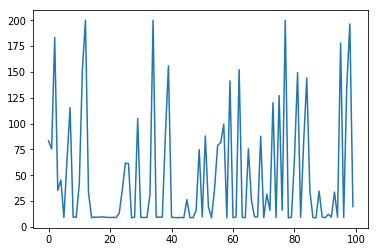

***Final run with final weights***
avg length: 200.0


In [7]:
if __name__ == '__main__':
  env = gym.make('CartPole-v0')
  episode_lengths, params = random_search(env)
  plt.plot(episode_lengths)
  plt.show()

  # play a final set of episodes
  print("***Final run with final weights***")
  play_multiple_episodes(env, 100, params)